In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-sales-in-india-20192021/car-sales-india-2021-1.csv
/kaggle/input/car-sales-information/all_regions.csv


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [4]:
df=pd.read_csv("/kaggle/input/car-sales-in-india-20192021/car-sales-india-2021-1.csv")


In [5]:
df.head()

,Company,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Maruti Suzuki,2021,139002,144761,146203,135879,32903,124280,133732,103187,63111,108991,109722,123016
1,Hyundai,2021,52005,51600,52600,49002,25001,40496,48042,46866,33087,37021,37001,32312
2,Tata,2021,26980,27224,29655,25095,15181,24111,30184,28017,25729,33296,29780,35300
3,Mahindra,2021,20498,16702,16643,18285,8004,16636,20797,15786,12863,20034,19400,17476
4,Kia,2021,19056,15380,19100,16111,11050,15015,15016,16750,14441,16331,14214,7797


In [6]:
df.describe()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000,42.000000
mean,2020.000000,19813.261905,19466.595238,17574.452381,12596.166667,8917.476190,14096.119048,16421.333333,16372.880952,16649.547619,20824.380952,18860.285714,18235.761905
std,0.826394,35208.667871,34842.851519,32246.619470,29310.602236,19992.322351,26254.914896,28725.212976,26912.451432,29172.313941,35579.930464,33012.001891,33005.784887
min,2019.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,192.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,1635.250000,1322.000000,1411.000000,0.000000,711.500000,1426.000000,1997.750000,2090.000000,2553.250000,3068.000000,2414.250000,2608.250000
50%,2020.000000,6762.500000,8026.500000,6349.500000,1368.500000,1707.000000,4851.500000,5720.500000,6776.000000,7925.500000,10423.000000,7385.500000,7015.500000
75%,2021.000000,18856.750000,15578.000000,17061.500000,9989.250000,10176.000000,12868.000000,14534.750000,13342.000000,14322.500000,18219.250000,17038.250000,14653.250000
max,2021.000000,139843.000000,144761.000000,146203.000000,135879.000000,121012.000000,124280.000000,133732.000000,113033.000000,147912.000000,163656.000000,139133.000000,140754.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Company  42 non-null     object
 1   Year     42 non-null     int64 
 2   Jan      42 non-null     int64 
 3   Feb      42 non-null     int64 
 4   Mar      42 non-null     int64 
 5   Apr      42 non-null     int64 
 6   May      42 non-null     int64 
 7   Jun      42 non-null     int64 
 8   Jul      42 non-null     int64 
 9   Aug      42 non-null     int64 
 10  Sep      42 non-null     int64 
 11  Oct      42 non-null     int64 
 12  Nov      42 non-null     int64 
 13  Dec      42 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 4.7+ KB


In [8]:
df.isnull().sum()

Company    0
Year       0
Jan        0
Feb        0
Mar        0
Apr        0
May        0
Jun        0
Jul        0
Aug        0
Sep        0
Oct        0
Nov        0
Dec        0
dtype: int64

In [9]:
df.columns

Index(['Company', 'Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
       'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [10]:
y=df[['Jan','May','Oct','Nov','Dec',]]

In [11]:
X=df[[ 'Feb','Mar','Apr', 'Jun', 'Jul',
       'Aug', 'Sep']]

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=102)

In [13]:
X_train

,Feb,Mar,Apr,Jun,Jul,Aug,Sep
20,10352,7023,0,3866,5386,5555,8116
36,6669,8271,6515,5333,6284,5517,5556
5,9324,7103,9072,4767,6055,11177,6765
19,7269,3697,0,1398,5383,7509,10199
22,7019,3519,0,2639,3937,4731,5765
11,2186,1159,1533,1633,1962,1631,2563
39,2617,2751,1995,2463,2521,2306,2550
26,1259,451,0,790,922,1003,1312
34,11760,12818,10112,10603,10423,10701,10203
32,0,0,0,0,0,6236,7754


In [14]:
X_test

,Feb,Mar,Apr,Jun,Jul,Aug,Sep
13,1103,1360,846,789,909,1173,1311
12,853,1159,961,734,3080,3829,3027
24,1376,1518,0,2012,2105,2851,2537
1,51600,52600,49002,40496,48042,46866,33087
10,4329,5528,2565,3558,4225,3900,3241
27,666,163,0,256,400,468,554
17,10673,3105,0,7959,10904,13407,14664
28,129936,138483,129990,111014,96478,93173,110454
35,6241,7127,6256,5400,3660,5704,8345


# Training the Model

In [15]:
from sklearn.linear_model import LinearRegression
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [16]:
print(f'coefficients {lm.coef_}')

coefficients [[ 0.76861712 -0.04378586  0.1658306  -0.07854854  0.12843225 -0.15897372
   0.33586585]
 [-0.96271865  0.85128231  0.31102544  0.87428823 -0.78302645 -0.79784161
   1.35169578]
 [ 0.31236924 -0.37173755  0.13795978  0.12996322  0.16159334  0.11415222
   0.77581397]
 [ 0.3621664  -0.69496627  0.16793367  0.39205111  0.23850073  0.23108905
   0.48039331]
 [ 0.51086941 -0.73089017  0.12385954 -0.09013698  1.11389801 -0.16302946
   0.28516759]]


In [32]:
predictions= lm.predict(X_test)

In [33]:
predictions

array([[   735.99966007,   1048.89877436,   1737.72895688,
          1203.44558158,    622.81562571],
       [  1008.97505876,   -393.35503749,   3728.37750683,
          3206.2542902 ,   3135.82249409],
       [  1001.17502512,   1108.6073315 ,   3142.46325519,
          2791.89545557,   1840.05368623],
       [ 51633.96685687,  15336.62683962,  47752.24827705,
         44601.26249317,  45468.42212109],
       [  3741.20202845,   2283.41297298,   4137.50861327,
          3197.64982405,   2987.33328612],
       [   146.5533394 ,   -340.69615142,   1110.18957441,
           878.04597182,    549.78888142],
       [ 11135.38605397,   -211.26197878,  18264.65053751,
         17751.24655045,  16432.11627338],
       [140819.18112001, 129578.48934469, 133769.28358537,
        113953.06498359,  94857.62465151],
       [  6963.08521225,  10464.48806312,   8963.33695543,
          6854.92143969,   3618.5933326 ]])

In [34]:
lm.intercept_

array([-501.14302281, -124.34133747,  381.61278066,  180.06970726,
       -175.48424412])

In [35]:
lm.score(X_train,y_train)

0.9862655194267486

Text(0, 0.5, 'Predicted Y')

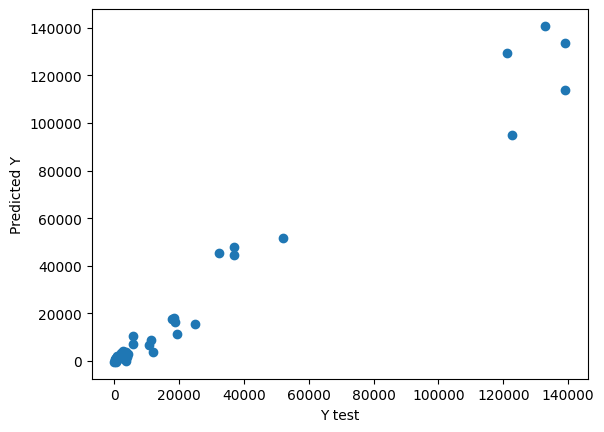

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)
plt.xlabel('Y test')
plt.ylabel('Predicted Y')

In [38]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3747.429137121702
MSE: 49816191.65797023
RMSE: 7058.058632369826


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9673883477586254

# from the dataset of car sales in india all are independent variables so only festival seasons months has considered as dependent variables and remaining are the independent variables

# if any suggestions kindly comment